# Calculus and Gradient Descent

![brace yourselves, math is coming](images/mathiscoming.jpeg)


## First Up: Derivatives

"Instantaneous rate of change"

<img src="images/hmmm.gif" alt="hmm spinning emoji gif" width=50 align = "left">

For a linear function:

$$
f'(x) = \dfrac{\Delta y}{\Delta x} =  \dfrac{f(x + \Delta x) - f(x)}{\Delta x}
$$

In [1]:
# Requisite imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Plot change x,y as lines for x=1 to x=2

# First, set our inputs

def jog(hours):
    '''
    Given some amount of time, in hours, how many miles will we run?
    Assumes our pace is 6 mph

    Input: hours (time in hours)
    Output: number of miles
    '''
    return 6*hours


x1 = 1  # Input at 1 hour
y1 = jog(x1)  # Output at 1 hour

x2 = 2  # Input at 2 hours
y2 = jog(x2)  # Output at 2 hours

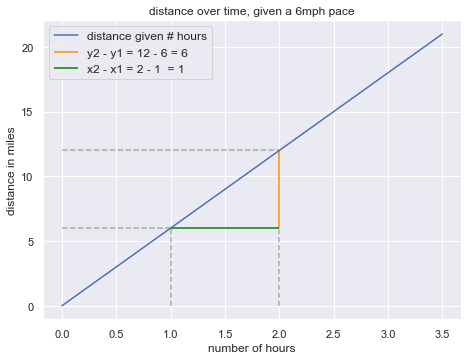

In [3]:
# And now, plot
fig, ax = plt.subplots(figsize=(7.5, 5.5))

# Providing inputs to plot between x=0 and x=3.5
x = np.linspace(0, 3.5)

# Plotting our function, f(x) = 6x, between 0 and 3.5 hours
ax.plot(x, jog(x), label="distance given # hours")

# Defining keyword arguments for our dashed lines
line_kws = dict(linestyle="dashed", color='darkgray')

# Creating our dashed lines
ax.hlines(y=y1, xmin=0, xmax=x1, **line_kws)
ax.vlines(x=x1, ymin=0, ymax=y1, **line_kws)

ax.hlines(y=y2, xmin=0, xmax=x2, **line_kws)
ax.vlines(x=x2, ymin=0, ymax=y1, **line_kws)

# Creating our "rise" portion
ax.vlines(x=x2, ymin=y1, ymax=y2, color="darkorange",
          label=f"y2 - y1 = {y2} - {y1} = {y2-y1}")

# Creating our "run" portion
ax.hlines(y=y1, xmin=x1, xmax=x2, color="green",
          label=f"x2 - x1 = {x2} - {x1}  = {x2-x1}")

ax.legend(loc='upper left', fontsize='large')
ax.set_ylabel("distance in miles")
ax.set_xlabel("number of hours")
plt.title("distance over time, given a 6mph pace")

plt.show()

### So... derivative?

What's the derivative for this function, given that the function is $f(x) = 6x$ ?

- $f'(x) = 6$


But wait, and this is important: What type of function is this?

- linear function


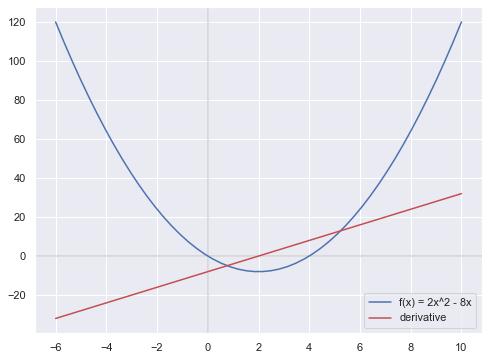

In [4]:
# plotting something a bit more complicated...
plt.figure(figsize=(8,6))

# Providing inputs to plot between x=-6 and x=10
x_values = np.linspace(-6, 10)
# Defining our y values with list comprehension 
function_values = [2*x**2-8*x for x in x_values]

# Plotting our axes at x=0 and y=0
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')

# The plot!
plt.plot(x_values, function_values, label = "f(x) = 2x^2 - 8x")

# the derivative
deriv_values = [4*x-8 for x in x_values]
plt.plot(x_values, deriv_values, label = "derivative", color = 'r')

plt.legend()
plt.show()

What's the derivative for this function, given that the function is $f(x) = 2x^2 - 8x$ ?

- $f'(x) = 4x - 8$


## Enter Machine Learning

This is a good time to think for a second about what it means to build models. Ultimately we're saying that, given some number of inputs (x, or features in our datasets) we can predict the outcome (y, or our target variable).

When we first started with linear regression, we were trying to find a **line of best fit** (and we'll get to that "best fit" part in a second) which captures some way of taking in a single variable (x) and transforming it (by maybe multiplying by a slope and maybe adding some constant) to find a continuous output (y).

> **Example:** if we believe the **miles per gallon rate** of a car is just a function of its **horsepower**, we would try to find the rate at which the horsepower then changes the MPG, plus some constant if the MPG isn't exactly zero when the horsepower is zero

### Example

In [5]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv('data/auto-mpg.csv')

In [6]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Let's first try this out ourselves.

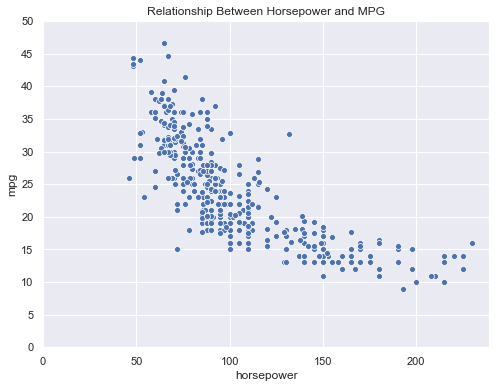

In [7]:
plt.figure(figsize=(8, 6))

# Plotting the actual relationship between horsepower and mpg
sns.scatterplot(x='horsepower', y='mpg', data=mpg_df)

plt.xticks(ticks=range(0, 250, 50))
plt.yticks(ticks=range(0, 55, 5))

plt.title('Relationship Between Horsepower and MPG')
plt.show()

What function captures this relationship?

- cuvature relationship


And now, with machine learning:

In [8]:
# Let's create a linear regression model using just the horsepower column
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = mpg_df[['horsepower']]
y = mpg_df['mpg']

model.fit(X, y)

m = model.coef_
b = model.intercept_

In [9]:
# y = mx + b
print(f'Slope: {m}')
print(f'Intercept: {b}')

Slope: [-0.15784473]
Intercept: 39.93586102117047


In [10]:
# Let's check the prediction for a row

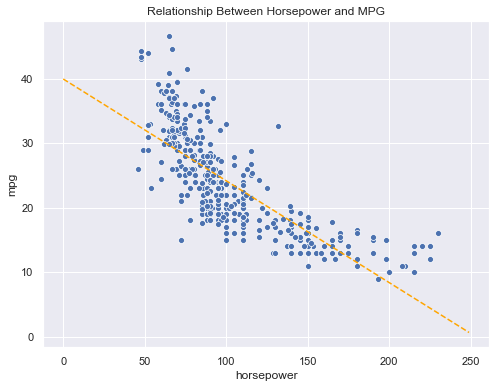

In [11]:
# Now let's plot the line over the actual values
plt.figure(figsize=(8, 6))

# Plotting the actual relationship between horsepower and mpg
sns.scatterplot(x='horsepower', y='mpg', data=mpg_df)

# Now plotting the line of best fit found by our model
axes = plt.gca()
x_vals = range(0, 250)
y_vals = b + m * x_vals
# Would be the same as model.predict(np.array(x_vals).reshape(-1,1))
plt.plot(x_vals, y_vals, '--', color='orange')

plt.title('Relationship Between Horsepower and MPG')
plt.show()

The above graph shows the approximate best fit line for the relationship between `horsepower` and `mpg` in our data, which we found through sklearn's function. But what if we wanted to test how it changes if we change that slope?

As you can imagine, as we test out different slopes, keeping the y-intercept constant, we can see how that affects our error - our Residual Sum of Squares (RSS)

### A Quick Aside on Cost Functions

> A cost function is a function that calculates the error of our models predictions vs ground truth.
>
> "Cost function" = "Loss function" = "Error"
    
#### Residual Sum of Squares

$ \large RSS = \sum_{i=1}^n(actual - expected)^2 = \sum_{i=1}^n(y_i - \hat{y})^2 $

#### Mean Squared Error

$ \large MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

- Note that MSE is just RSS divided by the number of data points. So its the *mean* of the residual sum of squares (AKA squared error)

#### Root Mean Squared Error

$ \large  RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

- Note that RMSE is just the square root of MSE

In [12]:
def RSS(x_values, y_values, m, b):
    y_pred = (b + m*x_values)
    return np.sum(np.square(y_pred - y_values))

In [13]:
x = mpg_df['horsepower'] # Grabbing x as a series this time
y = mpg_df['mpg'] # And our target

results = {}
# Testing 20 slope options between -0.5 and 0.5
for slope in np.linspace(-0.5, 0.5, 20):
    results[slope] = RSS(x, y, slope, 39.93) # remember, holding b constant

In [14]:
for k, v in results.items():
    print(f"Slope: {k:,.3f}: {v:,.2f}") # using :,.2f to round and add commas

Slope: -0.500: 578,221.61
Slope: -0.447: 416,701.84
Slope: -0.395: 282,093.55
Slope: -0.342: 174,396.76
Slope: -0.289: 93,611.46
Slope: -0.237: 39,737.64
Slope: -0.184: 12,775.32
Slope: -0.132: 12,724.49
Slope: -0.079: 39,585.14
Slope: -0.026: 93,357.29
Slope: 0.026: 174,040.93
Slope: 0.079: 281,636.06
Slope: 0.132: 416,142.67
Slope: 0.184: 577,560.78
Slope: 0.237: 765,890.38
Slope: 0.289: 981,131.47
Slope: 0.342: 1,223,284.05
Slope: 0.395: 1,492,348.12
Slope: 0.447: 1,788,323.68
Slope: 0.500: 2,111,210.73


The below graph zooms in to show how the model chose that exact slope for the line of best fit, by showing the residual sum of squares (RSS) as you change the slope of that line.

![Slope-RSS relationship image](images/slope-rss-relationship.png)



Note that the above curve is just for ONE coefficient, the slope, while holding the y-intercept constant. Already with simple linear regression we have to start using gradients, from partial derivatives, in order to optimize both parameters at the same time.

<img alt="gradient descent image from Section 23 - Gradient Descent: Step Sizes" src="images/gradientdescent.png" width=400>

And then we made linear regression more complicated by realizing that hey, more than one variable could have an impact on our target.

> Back to the example: If horsepower alone cannot be used to predict the miles per gallon rate of a car, maybe the horsepower feet plus the number of cylinders plus the weight of the car actually does predict the MPG. Each of those three separate variables will have their own way of changing the MPG, that rate of change, and in the end you might have some constant term too

All of these coefficients in linear regression are really the variables we're trying to adjust and optimize based on our training data, so we let statsmodels or sklearn compute gradients and find optimal parameters to best capture the relationship you have in your data.

Ultimately, when you are modeling data, I think it's easy to lose track of the fact that all you're doing is saying hey, given some inputs, I can figure out the relationship (captured in some probably increasingly complicated function) that can then be used to estimate an output in a way I find useful. 

Now, back to that sense of "best fit" - where, in pure math and when you're taught some of this calculus/derivative stuff in school, you start with a function that's provided in the textbook and asked to do stuff with it - instead, here we're saying I have these number of inputs, and some output I know for my training data, so let's find those rates of change and that constant that then captures the actual function of the line. 

That's where the gradients come in - as we add more and more coefficients in our linear regression model to optimize, it becomes too computationally expensive to do all of these steps every single time. 

### Step Size

The truth is, we can't simply use the derivative to find the minimum. Using that approach will be impossible in many scenarios as our models become more complicated.

We also can't alter all of the variables of our regression line across all points and calculate the result.  It will take too much time, as we have more variables to alter. 

But we can make changes, see what happens, and make more changes - all in an educated, math-informed way.

> Let's call each of these changes a **step**, and the size of the change our **step size**. 

1. A small learning rate requires many updates before reaching the minimum 
2. The optimal learning rate quickly converges to the minimum point 
3. A learning rate that is too large leads to divergent behavior: you may bounce around the minimum!  

True Gradient Descent doesn't just try a fixed number of evenly spaced values - it uses the size of the slope to indicated **how much** the parameter should change (the **step size**).

We use a parameter called the **learning rate** to control how rapidly we update the parameter.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-lp-gradient-descent/master/images/learning_rates.png" width=70%>

Our new task is to find step sizes that bring us to the best RSS quickly without overshooting the mark.

## Gradient Descent

![gradient descent in 3d gif from Andrew Ng](https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif)


### Tips for Gradient Descent

A few of the tips mentioned in [Machine Learning Mastery's tutorial on Gradient Descent for Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)

- **Plot Cost versus Time:** Collect and plot the cost values calculated by the algorithm each iteration, when we get to models that give you their iterations. The expectation for a well performing gradient descent run is a decrease in cost each iteration. If it does not decrease, try reducing your learning rate.
- **Learning Rate:** The learning rate value is a small real value such as 0.1, 0.001 or 0.0001. Try different values for your problem and see which works best.
- **Rescale Inputs:** The algorithm will reach the minimum cost faster if the shape of the cost function is not skewed and distorted. You can achieved this by rescaling all of the input variables (X) to the same range, such as [0, 1] or [-1, 1].

## Resources

There are so many!

#### Calculus:

- To build intuition about concepts in calculus, check out [3 Blue 1 Brown's Essence of Calculus Youtube Playlist](https://www.youtube.com/watch?v=WUvTyaaNkzM&list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr) - 12 videos that start off by explaining derivatives
- The same guy who runs the 3 Blue 1 Brown account also does some videos for Khan Academy, including the [Partial Derivatives videos from the Multivariable Calculus course](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives)

#### Gradient Descent:

- Andrew Ng was a famous name in machine learning before he created the ultra-popular [Machine Learning Coursera course](https://www.coursera.org/learn/machine-learning), which has a great explanation of gradient descent

    - [This blog post by Chris McCormick](https://mccormickml.com/2014/03/04/gradient-descent-derivation/) breaks out some of the explanation from the course, specifically trying to derive the math
    
- As referenced above, [Machine Learning Mastery has a tutorial on Gradient Descent for Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/), walks through gradient descent with surprisingly little math